In the notebook `validate_specsim.ipynb`, I compared `specsim` output to CMX data for 

- tile ID = 70502
- date = 20200225
- exp ID = 52113
- spectrograph 0

I found significant discrepancies in the noise levels but David Kirkby suggested in [specsim issue #110](https://github.com/desihub/specsim/issues/110) that this may be caused by transparency and fiber acceptance fraction. In this notebook we'll take a look at the transparencies

In [1]:
import os 
import fitsio
import numpy as np 

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

read in GFA observing conditions compiled by Aaron

In [3]:
fgfa = os.path.join('/global/cfs/cdirs/desi/users/ameisner/GFA/conditions', 'offline_all_guide_ccds_thru_20200315.fits')
gfa = fitsio.read(fgfa)

In [4]:
isexp = (gfa['EXPID'] == 52113)

(0, 1.1)

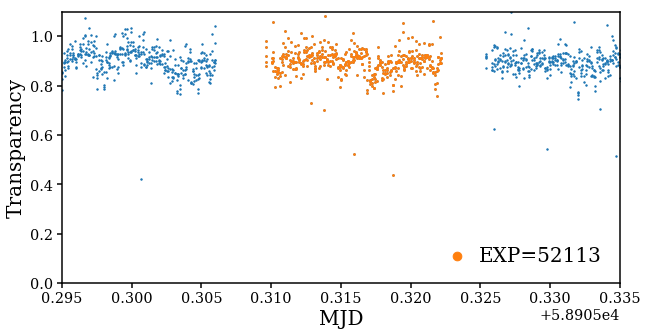

In [6]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)

sub.scatter(gfa['MJD'][(gfa['MJD'] > 58900) & (gfa['MJD'] < 58910)], gfa['TRANSPARENCY'][(gfa['MJD'] > 58900) & (gfa['MJD'] < 58910)], s=2)
sub.scatter(gfa['MJD'][isexp], gfa['TRANSPARENCY'][isexp], s=3, label='EXP=52113')

sub.legend(loc='lower right', fontsize=20, markerscale=5, handletextpad=0.1)
sub.set_xlabel('MJD', fontsize=20)
sub.set_xlim(58905.295, 58905.335)

sub.set_ylabel('Transparency', fontsize=20)
sub.set_ylim(0, 1.1)